Pearson r for nsdgeneral degree 1: 0.0086 (p = 7.89e-01)
Pearson r for nsdgeneral degree 2: 0.0401 (p = 2.09e-01)
Pearson r for Default degree 1: 0.0138 (p = 6.66e-01)
Pearson r for Default degree 2: -0.0117 (p = 7.13e-01)
Pearson r for Auditory degree 1: -0.0746 (p = 1.93e-02)
Pearson r for Auditory degree 2: -0.0329 (p = 3.03e-01)


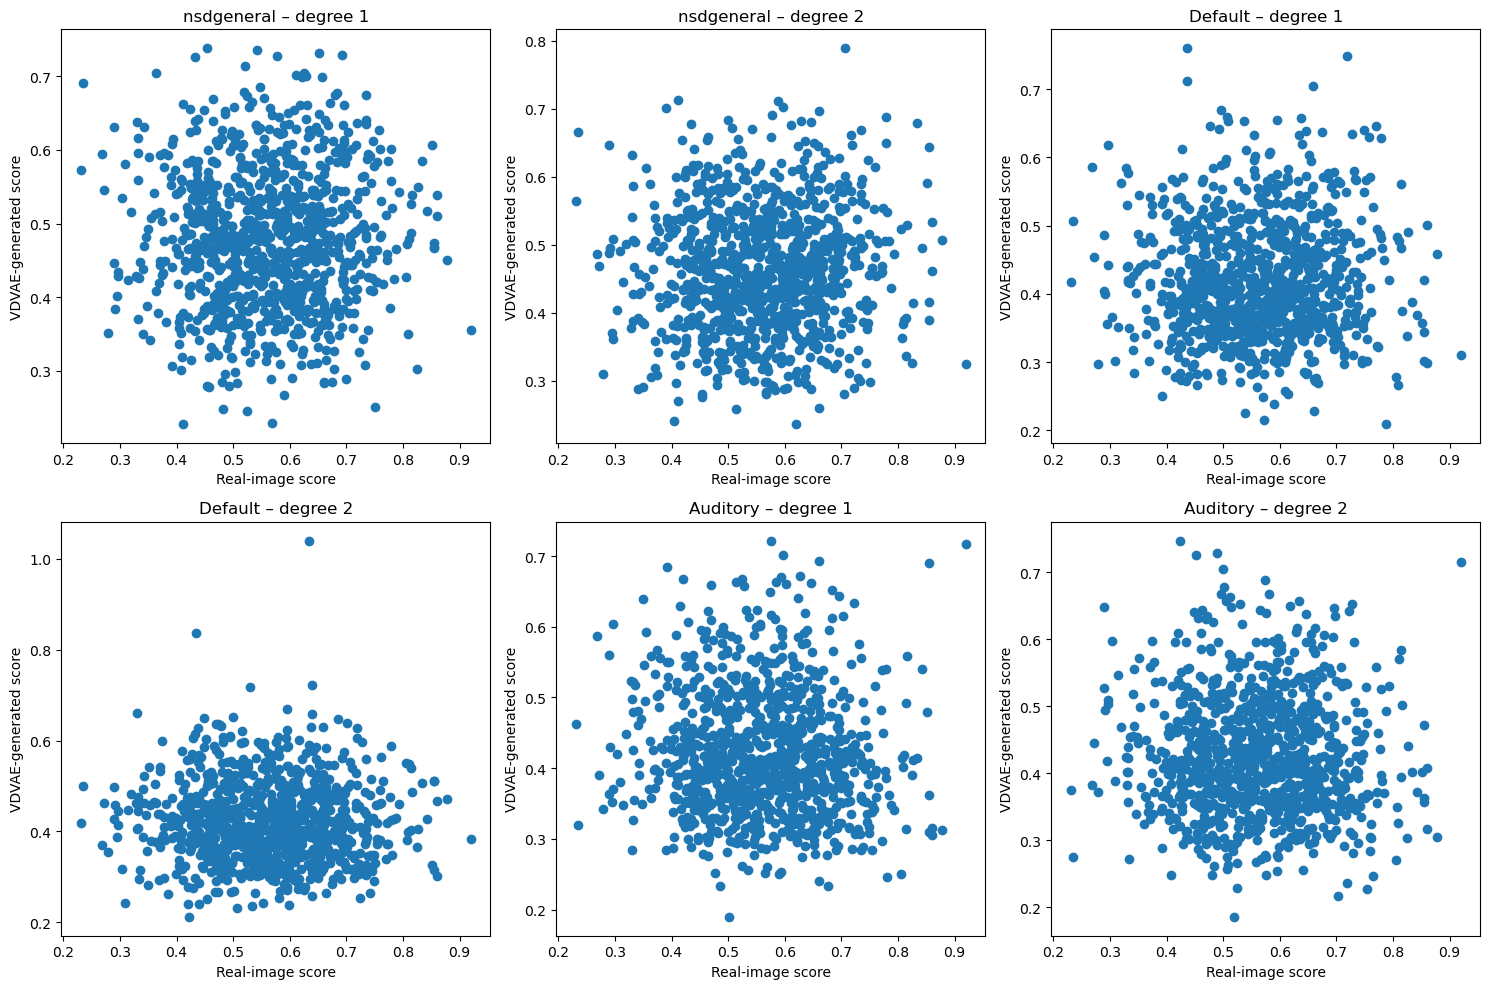

In [1]:
import os
import json

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# ─────────────────────────────────────────────────────────────────
# 1) Point this to where your JSONs live
# ─────────────────────────────────────────────────────────────────
RESULT_DIR = r"C:\Users\sOrOush\SoroushProjects\14_CLIP_Ozcelic\results\assessor_results"

# ─────────────────────────────────────────────────────────────────
# 2) Load real-image scores
# ─────────────────────────────────────────────────────────────────
with open(os.path.join(RESULT_DIR, "real_scores.json"), "r") as f:
    real_scores = np.array(json.load(f))

# ─────────────────────────────────────────────────────────────────
# 3) Define your groups & degrees, and prep the plots
# ─────────────────────────────────────────────────────────────────
groups = ["nsdgeneral", "Default", "Auditory"]
degrees = [1, 2]

fig, axes = plt.subplots(2, 3, figsize=(15, 10), tight_layout=True)

# ─────────────────────────────────────────────────────────────────
# 4) Loop through each combination, plot & compute Pearson r
# ─────────────────────────────────────────────────────────────────
for idx, (grp, deg) in enumerate((g, d) for g in groups for d in degrees):
    # load generated scores
    fname = f"{grp}_degree{deg}_scores.json"
    path = os.path.join(RESULT_DIR, fname)
    with open(path, "r") as f:
        gen_scores = np.array(json.load(f))

    # get axis
    ax = axes[idx // 3][idx % 3]
    ax.scatter(real_scores, gen_scores)
    ax.set_title(f"{grp} – degree {deg}")
    ax.set_xlabel("Real‑image score")
    ax.set_ylabel("VDVAE‑generated score")

    # Pearson correlation
    r, p = pearsonr(real_scores, gen_scores)
    print(f"Pearson r for {grp} degree {deg}: {r:.4f} (p = {p:.2e})")

# ─────────────────────────────────────────────────────────────────
# 5) Show all plots
# ─────────────────────────────────────────────────────────────────
plt.show()


Pearson r for Real vs Real: 1.0000 (p = 0.00e+00)
Pearson r for nsdgeneral – degree 1: 0.0086 (p = 7.89e-01)
Pearson r for nsdgeneral – degree 2: 0.0401 (p = 2.09e-01)
Pearson r for Default – degree 1: 0.0138 (p = 6.66e-01)
Pearson r for Default – degree 2: -0.0117 (p = 7.13e-01)
Pearson r for Auditory – degree 1: -0.0746 (p = 1.93e-02)
Pearson r for Auditory – degree 2: -0.0329 (p = 3.03e-01)


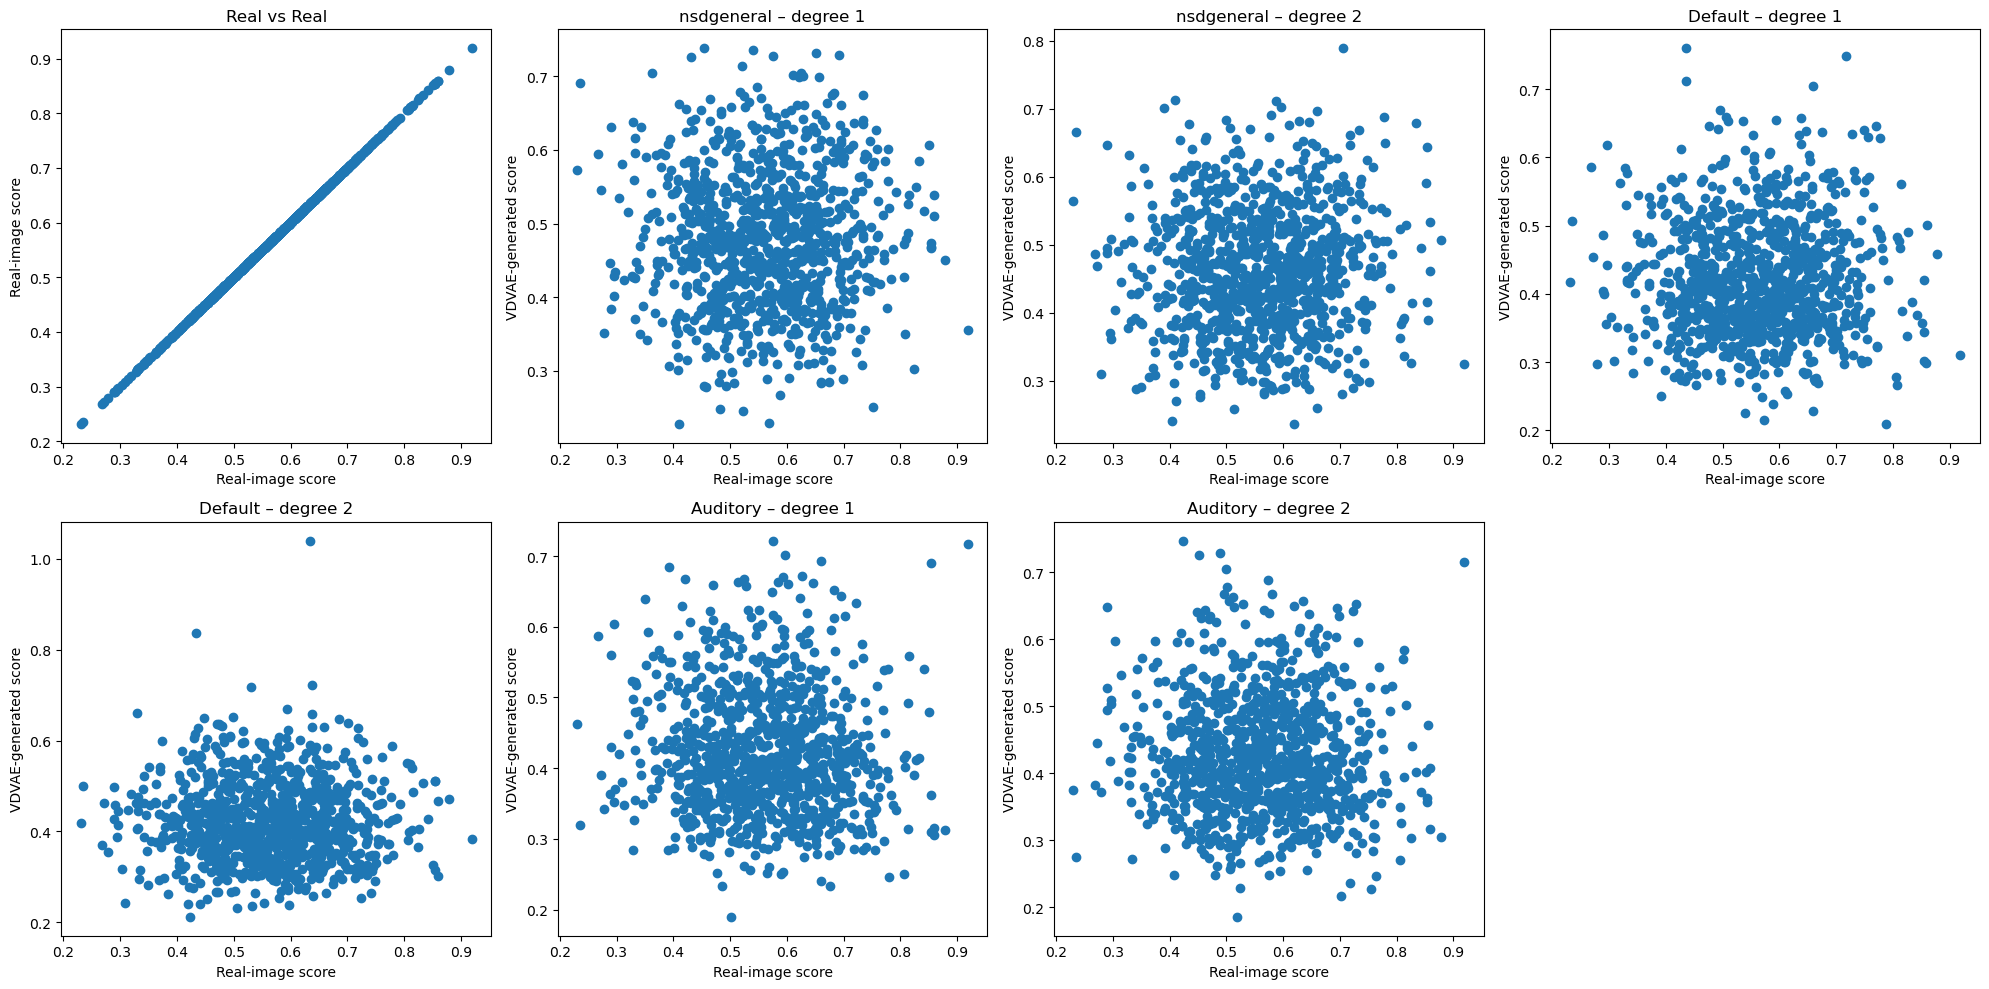

In [3]:
import os
import json
import sys

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Path to the JSON results
RESULT_DIR = r"C:\Users\sOrOush\SoroushProjects\14_CLIP_Ozcelic\results\assessor_results"

# Check that the results directory exists before proceeding
if not os.path.isdir(RESULT_DIR):
    print(f"[ERROR] Results directory not found: {RESULT_DIR}")
else:
    # Load real-image scores
    real_path = os.path.join(RESULT_DIR, "real_scores.json")
    if not os.path.isfile(real_path):
        print(f"[ERROR] real_scores.json not found in {RESULT_DIR}")
        sys.exit(1)
    with open(real_path, "r") as f:
        real_scores = np.array(json.load(f))

    # Define groups and degrees for generated images
    groups = ["nsdgeneral", "Default", "Auditory"]
    degrees = [1, 2]

    # Prepare list of (title, x_scores, y_scores) tuples
    comparisons = [
        ("Real vs Real", real_scores, real_scores)
    ]

    # Load generated-image scores
    for grp in groups:
        for deg in degrees:
            fname = f"{grp}_degree{deg}_scores.json"
            filepath = os.path.join(RESULT_DIR, fname)
            if not os.path.isfile(filepath):
                print(f"[WARN] {fname} not found in {RESULT_DIR}, skipping.")
                continue
            with open(filepath, "r") as f:
                gen_scores = np.array(json.load(f))
            title = f"{grp} – degree {deg}"
            comparisons.append((title, real_scores, gen_scores))

    # Create a 2×4 grid of plots
    fig, axes = plt.subplots(2, 4, figsize=(20, 10), tight_layout=True)
    axes_flat = axes.flatten()

    # Generate each subplot
    for idx, (title, xs, ys) in enumerate(comparisons):
        ax = axes_flat[idx]
        ax.scatter(xs, ys)
        ax.set_title(title)
        ax.set_xlabel("Real‑image score")
        ylabel = "Real‑image score" if title == "Real vs Real" else "VDVAE‑generated score"
        ax.set_ylabel(ylabel)

        # Compute and print Pearson correlation
        r, p = pearsonr(xs, ys)
        print(f"Pearson r for {title}: {r:.4f} (p = {p:.2e})")

    # Hide any unused subplot(s)
    for j in range(len(comparisons), len(axes_flat)):
        axes_flat[j].axis("off")

    plt.show()


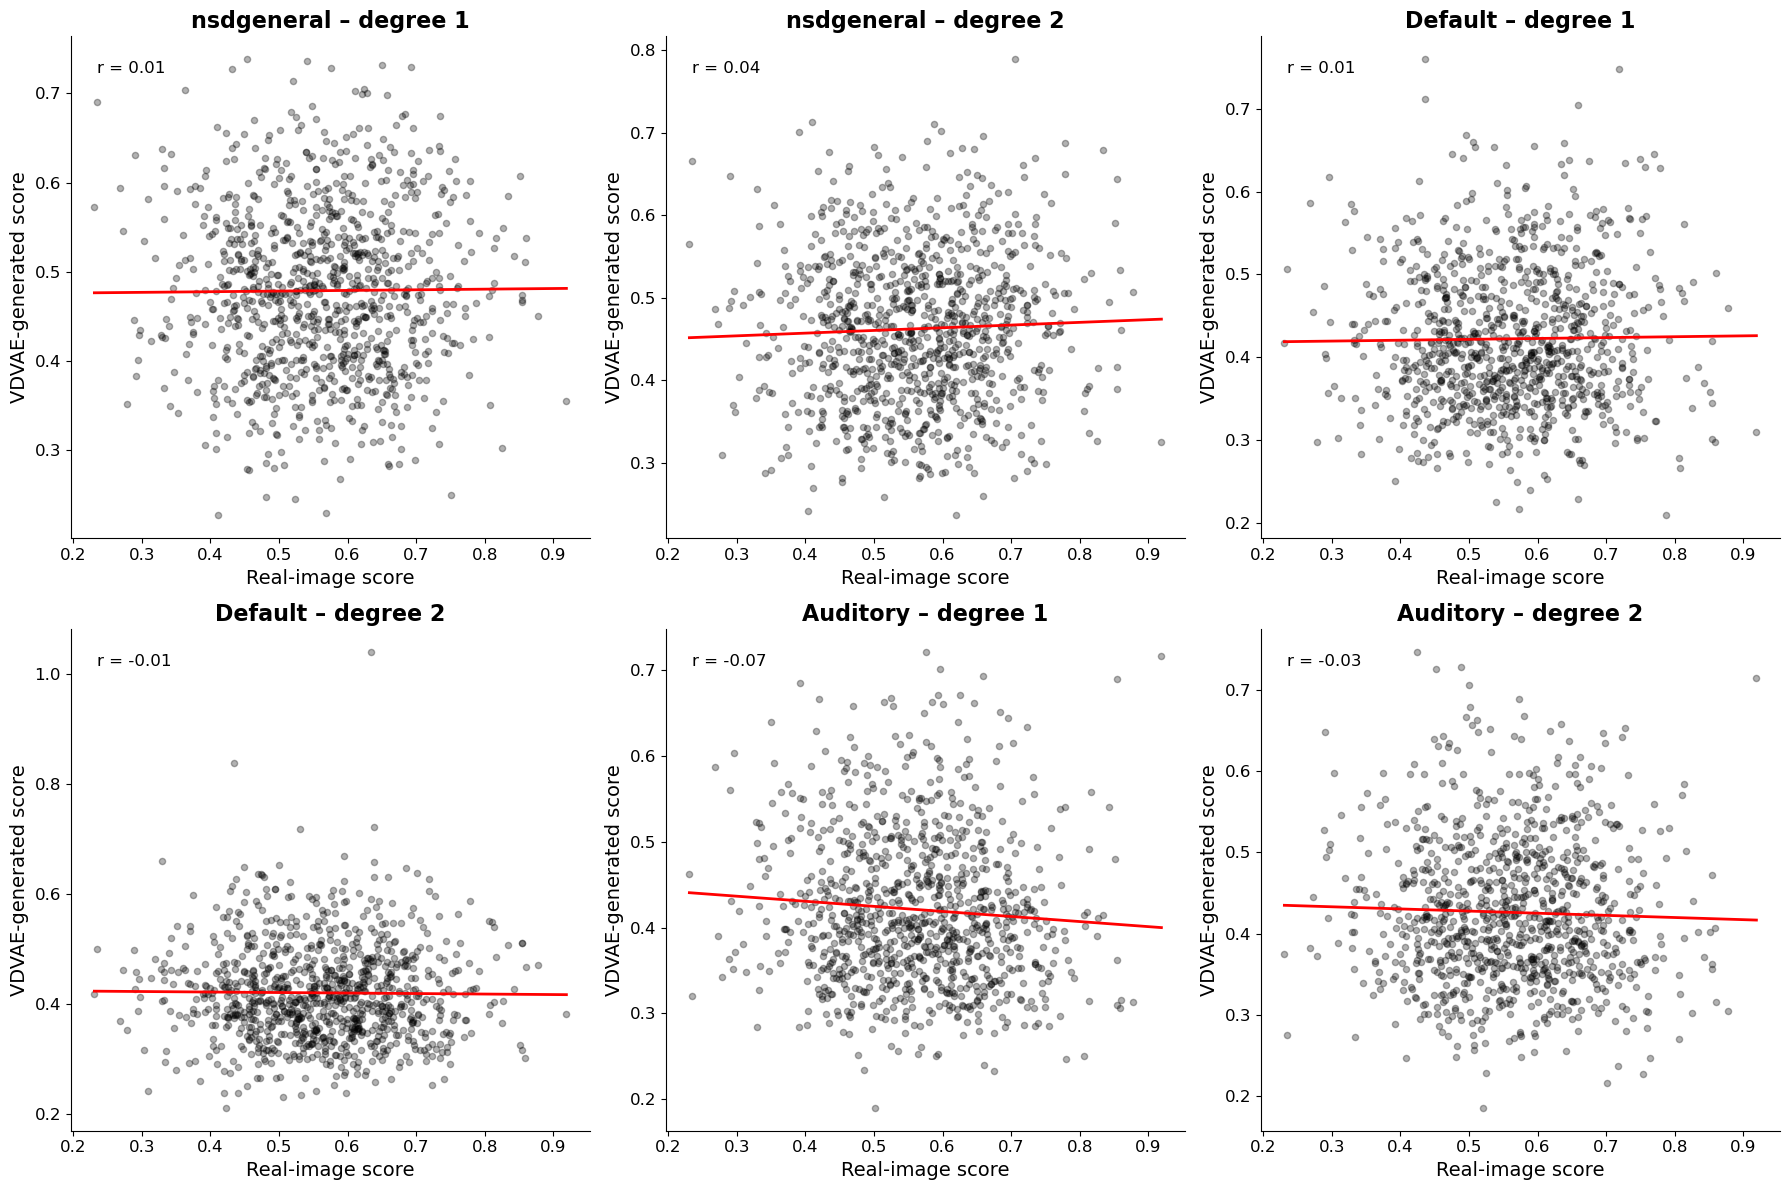

In [4]:
#!/usr/bin/env python3
import os
import json

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# ─────────────────────────────────────────────────────────────────
# 1) Point this to where your JSONs live
# ─────────────────────────────────────────────────────────────────
RESULT_DIR = r"C:\Users\sOrOush\SoroushProjects\14_CLIP_Ozcelic\results\assessor_results"

# ─────────────────────────────────────────────────────────────────
# 2) Load the “real” scores
# ─────────────────────────────────────────────────────────────────
with open(os.path.join(RESULT_DIR, "real_scores.json"), "r") as f:
    real_scores = np.array(json.load(f))

# ─────────────────────────────────────────────────────────────────
# 3) Prepare the list of (title, x, y) for each comparison
# ─────────────────────────────────────────────────────────────────
groups = ["nsdgeneral", "Default", "Auditory"]
degrees = [1, 2]

comparisons = []
for grp in groups:
    for deg in degrees:
        fname = f"{grp}_degree{deg}_scores.json"
        path = os.path.join(RESULT_DIR, fname)
        with open(path, "r") as f:
            gen_scores = np.array(json.load(f))
        title = f"{grp} – degree {deg}"
        comparisons.append((title, real_scores, gen_scores))

# ─────────────────────────────────────────────────────────────────
# 4) Plot setup: 2×3 grid, clean spines
# ─────────────────────────────────────────────────────────────────
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top']   = False

fig, axes = plt.subplots(2, 3, figsize=(18, 12), tight_layout=True)
axes_flat = axes.flatten()

# ─────────────────────────────────────────────────────────────────
# 5) Helper to draw each scatter + fit line + corr coefficient
# ─────────────────────────────────────────────────────────────────
def plot_scatter_corr(ax, x, y, title):
    ax.scatter(x, y, color="black", alpha=0.3, s=20)
    ax.set_title(title, fontsize=16, fontweight='bold')
    ax.set_xlabel("Real‑image score", fontsize=14)
    ax.set_ylabel("VDVAE‑generated score", fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=12)

    # Pearson r
    r = np.corrcoef(x, y)[0, 1]
    ax.text(0.05, 0.95, f"r = {r:.2f}",
            transform=ax.transAxes, va='top', fontsize=12)

    # Regression line
    m, b = np.polyfit(x, y, 1)
    xs = np.array([x.min(), x.max()])
    ax.plot(xs, m*xs + b, color='red', lw=2)

# ─────────────────────────────────────────────────────────────────
# 6) Loop and plot
# ─────────────────────────────────────────────────────────────────
for ax, (title, xs, ys) in zip(axes_flat, comparisons):
    plot_scatter_corr(ax, xs, ys, title)

# If there are any unused subplots, hide them
for i in range(len(comparisons), len(axes_flat)):
    axes_flat[i].axis('off')

plt.show()
